# Pre Train Chemprop Model #

## Verify GPU Availability ##

In [51]:
import warnings

warnings.filterwarnings('ignore')

In [26]:
!nvidia-smi

Thu May 30 15:11:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX 6000 Ada Gene...    On  |   00000000:A1:00.0 Off |                  Off |
| 30%   37C    P8             25W /  300W |       4MiB /  49140MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
def PRINT() -> None: print(f"{'-'*80}\nDone\n{'-'*80}")
def PRINTM(M) -> None: print(f"{'-'*80}\n{M}\n{'-'*80}")

In [3]:
import torch 

if torch.cuda.is_available():
    PRINTM(f"GPU is available.")
    device = "cuda"
else:
    PRINTM(f"GPU is not available. Using CPU instead.")
    device = "cpu"

--------------------------------------------------------------------------------
GPU is available.
--------------------------------------------------------------------------------


In [4]:
PRINTM(f"PyTorch version: {torch.__version__}")
PRINTM(f"CUDA available: {torch.cuda.is_available()}")
PRINTM(f"CUDA version:  {torch.version.cuda}")
print(f"CUDA device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No CUDA'}")
PRINTM("")

--------------------------------------------------------------------------------
PyTorch version: 2.3.0+cu121
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
CUDA available: True
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
CUDA version:  12.1
--------------------------------------------------------------------------------
CUDA device: NVIDIA RTX 6000 Ada Generation
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------


In [5]:
torch._C._cuda_getDeviceCount() > 0

True

## Import Libraries ## 

In [6]:
import os
import pandas as pd

In [7]:
ls

datasets/        job-1171650.out       pt_checkpoints/
DLResearchPPI/   job-1171651.out       pt_dataset_final_scaled.csv
job-1171612.out  proj5_pt-Copy1.ipynb  sbatch_gpu.example
job-1171647.out  proj5_pt.ipynb


In [8]:
pt_dataset = pd.read_csv('pt_dataset_final_scaled.csv')
PRINTM('Loaded the dataset successfully !')

--------------------------------------------------------------------------------
Loaded the dataset successfully !
--------------------------------------------------------------------------------


In [9]:
pt_dataset

,SMILES,NumAtomStereoCenters,NumAminoBonds,MolWt,NumValenceElectrons,TPSA,MolLogP,NumHeteroatoms,NumRotatableBonds,HeavyAtomCount,...,MorganFP_1014,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023
0,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1,0.275350,-1.282888,-0.845050,-0.596121,-0.161588,-2.263520,-0.537124,1.030293,-0.672638,...,1,0,0,0,0,0,0,0,0,0
1,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1,2.681269,-0.284300,-0.324994,-0.044691,0.165290,-0.451371,0.148930,-0.852016,-0.099342,...,0,0,0,0,0,1,0,0,0,0
2,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1,0.275350,-0.284300,-1.284886,-1.478409,-0.110347,-1.000911,0.148930,-1.479452,-1.532583,...,0,0,0,0,0,1,0,0,0,1
3,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC,0.275350,-0.284300,-0.383746,-0.265263,-0.744666,-0.998111,-0.537124,1.030293,-0.672638,...,0,0,0,0,0,0,0,0,0,0
4,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1,0.275350,-0.284300,0.253513,0.396453,1.396822,0.816772,0.834984,-0.224580,0.473955,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40634,CC(C)(CNC(=N)N)N1CCc2ccccc2C1.I,-0.927610,-1.282888,0.331116,-1.478409,-0.305885,-1.041673,-1.223178,-0.852016,-1.819231,...,0,0,0,0,0,0,0,0,0,0
40635,Cc1ccc(C2=NN(C(=O)c3cccnc3)C(c3ccc(F)cc3)C2)cc...,0.275350,-0.284300,0.762365,0.506739,-1.459084,2.259163,-0.537124,-0.852016,0.760603,...,0,0,0,0,0,1,0,0,0,0
40636,CCOc1cccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CC2CC...,1.478309,-0.284300,1.233974,1.499314,1.021650,1.124757,0.148930,1.030293,1.620548,...,0,0,0,0,0,1,0,0,0,0
40637,CCn1cc(C2CSCCN2)cn1.Cl.Cl,0.275350,-1.282888,-1.746570,-2.470983,-2.384354,-0.823228,-0.537124,-1.479452,-2.965824,...,0,0,0,0,0,1,0,0,0,0


## Visualization ##

In [9]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

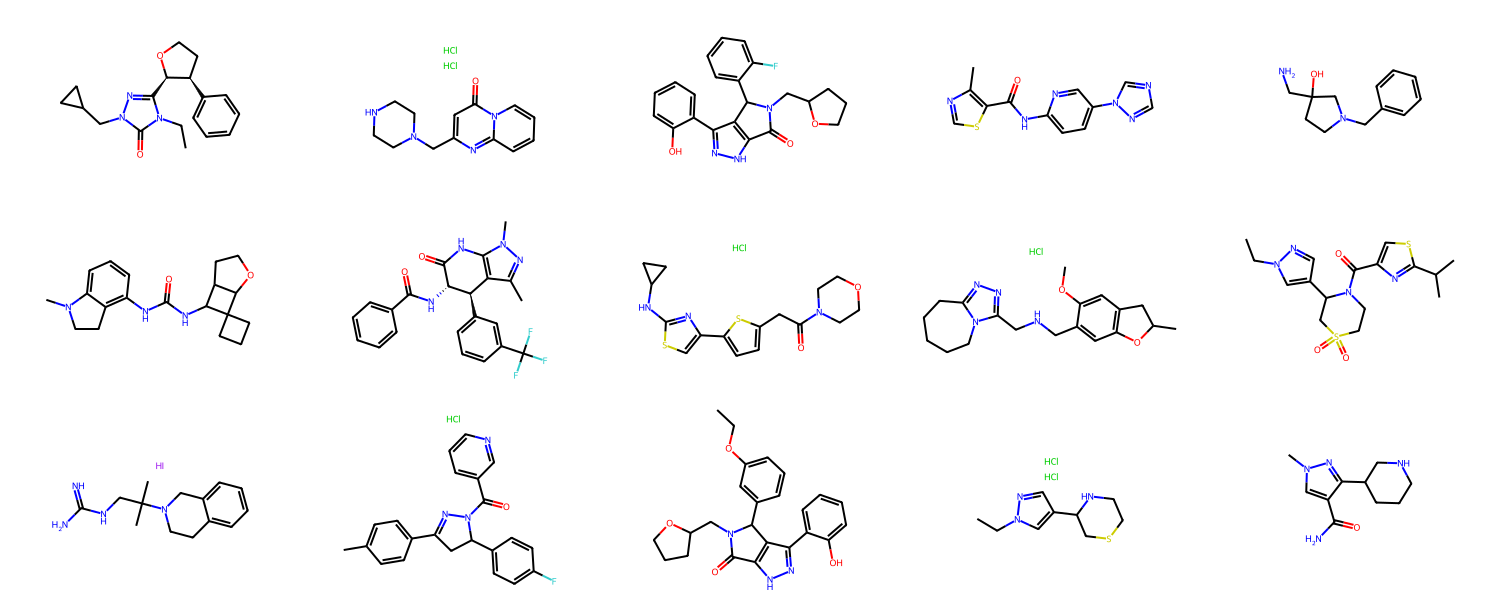

In [11]:
sample_smiles = pt_dataset['SMILES'].tail(15)
molecules = [Chem.MolFromSmiles(smile) for smile in sample_smiles]

# Visualize the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 200))
img

## Pre Train Multi-Regression Model using Chemprop V2

In [12]:
import chemprop

In [13]:
print(chemprop.__version__)

2.0.0


In [24]:
!chemprop train --data-path "/sise/home/gavrilev/DLResearchPPI/Project 5 PT, FT & more/pt_dataset_final_scaled.csv" \
--task-type regression \
--output-dir pt_v2_checkpoints \
--split-sizes 0.8 0.1 0.1 \
--num-folds 5 \
--epochs 75 \
--num-workers 5

Wrote config file to pt_v2_checkpoints/config.toml
/home/gavrilev/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
/home/gavrilev/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
/home/gavrilev/.conda/envs/chemprop/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python3.11 /home/gavrilev/.conda/envs/chemprop

## Extract Embeddings for Final Dataset ##

After we've pre trained multi-regression model using chemprop, we can use the weights of the model in order to generate embeddings for molecule SMILES with length `|embedding(SMILES)| = 300`.

In [53]:
import os
import pandas as pd
import chemprop

### Load Dataset, Clean & Visualize Molecule Structure ###

#### Load Dataset ####

In [54]:
final_dataset = pd.read_csv(os.path.join('datasets', 'final_dataset_2_0.75.csv'))
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [55]:
final_dataset

,smiles,uniprot_id1,uniprot_id2,label
0,OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN...,P08514,P05106,0
1,CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3...,P04637,O15151,0
2,CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1,P13612,P05556,0
3,CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c(...,P05362,P20701,1
4,CC(C)C1=C(SC2=N[C@](C)([C@H](N12)c1ccc(Cl)cc1)...,Q00987,P04637,1
...,...,...,...,...
109243,Clc1cc(OCCN2CCOCC2)ccc1Nc1nc2c(-c3nnc[nH]3)ccc...,P08514,P05106,0
109244,COC(=O)c1cc(O)cc(OC)c1Oc1cc(C)cc(O)c1C(=O)O,Q14145,Q16236,0
109245,CCCC1=CN(C[C@H](NC(=O)OCc2ccccc2)C(=O)O)C(=O)N...,P08514,P05106,0
109246,O=C(CSc1nc2ccccc2c(=O)n1Cc1ccc2c(c1)OCO2)NCc1c...,P06756,P05106,1


As can be visualized above, our final dataset is built of 4 columns.
The first column represents the modulator SMILES string that represents the molecule structure. Next, we have two columns (i.e., uniprot_id1 and uniprot_id2) representing two proteins ids in the PPI. Lastly, we've the label column which represents whether the modulator inhibits the PPI between the two proteins (i.e, 1 - inhibits, 0 - no)

In [56]:
final_dataset.columns

Index(['smiles', 'uniprot_id1', 'uniprot_id2', 'label'], dtype='object')

In [57]:
smiles_df = final_dataset[['smiles']]

In [58]:
smiles_df.head()

,smiles
0,OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN...
1,CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3...
2,CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1
3,CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c(...
4,CC(C)C1=C(SC2=N[C@](C)([C@H](N12)c1ccc(Cl)cc1)...


#### Clean the Dataset ####

In [62]:
PRINTM(f'Old data frame shape -> {smiles_df.shape}')

initial_count = smiles_df.shape[0]
smiles_df = smiles_df.drop_duplicates()
final_count = smiles_df.shape[0]
duplicates_dropped = initial_count - final_count

PRINTM(f'New data frame shape -> {smiles_df.shape}')
PRINTM(f"Number of duplicate rows dropped: {duplicates_dropped}")

--------------------------------------------------------------------------------
Old data frame shape -> (109248, 1)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
New data frame shape -> (26641, 1)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Number of duplicate rows dropped: 82607
--------------------------------------------------------------------------------


In [63]:
smis = smiles_df['smiles']

In [66]:
valid_smis = []
invalid_smis = []

for smi in smis:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        valid_smis.append(smi)
    else:
        invalid_smis.append(smi)
        print(f"Invalid SMILES string: {smi}")

PRINTM(f"Number of valid SMILES: {len(valid_smis)}")
PRINTM(f"Number of invalid SMILES: {len(invalid_smis)}")

[09:13:47] Explicit valence for atom # 31 N, 4, is greater than permitted


Invalid SMILES string: C(c1cc(c2ccc(cc2C)F)c2c(C(=O)N(Cc3cc(cc(c3)OC)OC)CC2)c1)N1=C(N(C=C1)C)N


[09:13:47] SMILES Parse Error: syntax error while parsing: na
[09:13:47] SMILES Parse Error: Failed parsing SMILES 'na' for input: 'na'


Invalid SMILES string: na
--------------------------------------------------------------------------------
Number of valid SMILES: 26639
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Number of invalid SMILES: 2
--------------------------------------------------------------------------------


##### Drop the Problematic Rows #####

In [70]:
# Problematic SMILES strings
problematic_smiles = [
    "C(c1cc(c2ccc(cc2C)F)c2c(C(=O)N(Cc3cc(cc(c3)OC)OC)CC2)c1)N1=C(N(C=C1)C)N",
    "na"
]

smiles_df = smiles_df[~smiles_df['smiles'].isin(problematic_smiles)]

PRINTM(f"Number of rows after dropping problematic SMILES: {smiles_df.shape[0]}")

--------------------------------------------------------------------------------
Number of rows after dropping problematic SMILES: 26639
--------------------------------------------------------------------------------


### Visualize the Molecules ###

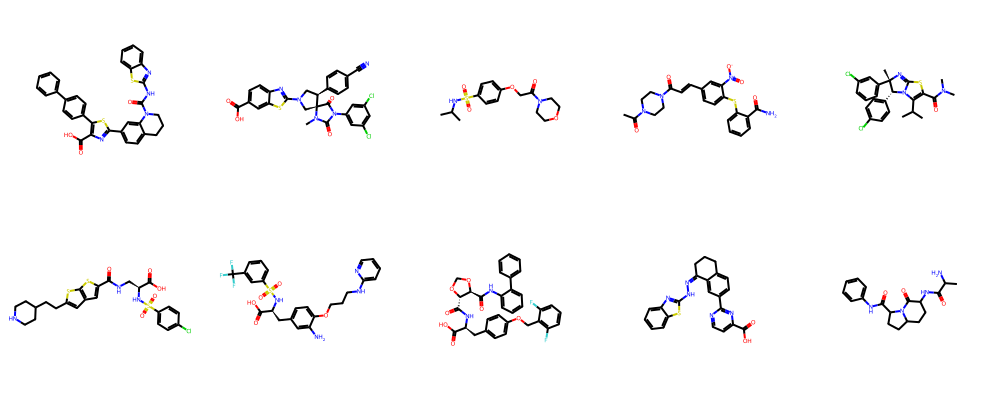

In [71]:
sample_smiles = smiles_df['smiles'].head(10)
molecules = [Chem.MolFromSmiles(smile) for smile in sample_smiles]

options = Draw.MolDrawOptions()
options.bondLineWidth = 3 
options.atomLabelFontSize = 18  

# Visualize the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200))
display(img)

In [72]:
PRINTM(f'Old data frame shape -> {smiles_df.shape}')

initial_count = smiles_df.shape[0]
smiles_df = smiles_df.drop_duplicates()
final_count = smiles_df.shape[0]
duplicates_dropped = initial_count - final_count

PRINTM(f'New data frame shape -> {smiles_df.shape}')
PRINTM(f"Number of duplicate rows dropped: {duplicates_dropped}")

--------------------------------------------------------------------------------
Old data frame shape -> (26639, 1)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
New data frame shape -> (26639, 1)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Number of duplicate rows dropped: 0
--------------------------------------------------------------------------------


In [73]:
smiles_df.to_csv(os.path.join('datasets', 'smiles_df.csv'), index=False)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [11]:
from chemprop import data, featurizers, models

In [12]:
checkpoints_path = os.path.join('pt_v2_checkpoints', 'fold_0', 'model_0', 'checkpoints', 'best-epoch=74-val_loss=0.47.ckpt')

In [130]:
mpnn = models.MPNN.load_from_checkpoint(checkpoints_path)
mpnn.eval()
mpnn

MPNN(
  (message_passing): BondMessagePassing(
    (W_i): Linear(in_features=86, out_features=300, bias=False)
    (W_h): Linear(in_features=300, out_features=300, bias=False)
    (W_o): Linear(in_features=372, out_features=300, bias=True)
    (W_d): Linear(in_features=300, out_features=300, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (tau): ReLU()
    (V_d_transform): Identity()
    (graph_transform): GraphTransform(
      (V_transform): Identity()
      (E_transform): Identity()
    )
  )
  (agg): MeanAggregation()
  (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (predictor): RegressionFFN(
    (ffn): MLP(
      (0): Sequential(
        (0): Linear(in_features=300, out_features=300, bias=True)
      )
      (1): Sequential(
        (0): ReLU()
        (1): Dropout(p=0.0, inplace=False)
        (2): Linear(in_features=300, out_features=1224, bias=True)
      )
    )
    (criterion): MSELoss(task_weights=[[1.0, 1.0, 1.0, 1.0, 1.

### load Data ###

In [74]:
na_count = (smiles_df['smiles'] == 'na').sum()
nan_count = smiles_df['smiles'].isna().sum()

print(f"Number of 'na' values: {na_count}")
print(f"Number of NaN values: {nan_count}")

Number of 'na' values: 0
Number of NaN values: 0


In [75]:
nan_counts = smiles_df.isna().sum()
nan_counts

smiles    0
dtype: int64

In [19]:
smis[:5]

0    OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN...
1    CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3...
2             CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1
3    CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c(...
4    CC(C)C1=C(SC2=N[C@](C)([C@H](N12)c1ccc(Cl)cc1)...
Name: smiles, dtype: object

In [101]:
smiles_df = pd.read_csv(os.path.join('datasets', 'smiles_df.csv'))
smis = smiles_df['smiles']
smiles_data = [data.MoleculeDatapoint.from_smi(smi) for smi in smis]

PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [119]:
smiles_data[:5]

[MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7fd035810900>, y=None, weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN(C(=O)Nc3nc4ccccc4s3)c2c1', V_f=None, E_f=None, V_d=None),
 MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7fd035d25850>, y=None, weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3ccc(C(=O)O)cc3s1)C[C@H]2c1ccc(C#N)cc1', V_f=None, E_f=None, V_d=None),
 MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7fd035d25770>, y=None, weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1', V_f=None, E_f=None, V_d=None),
 MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7fd035d25690>, y=None, weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c([N+](=O)[O-])c2)CC1', V_f=None, E_f=None, V_d=None),
 

In [102]:
featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

In [103]:
smiles_dset = data.MoleculeDataset(smiles_data, featurizer=featurizer)
smiles_loader = data.build_dataloader(smiles_dset, shuffle=False)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [104]:
smiles_loader

### Calculate Fingerprints (Embeddings) ###

In [105]:
smiles_loader

In [ ]:
mpnn.to('cpu')

In [128]:
with torch.no_grad():
    fingerprints = [
        # Extract the embeddings from the last FFN layer (thus i= -1)
        mpnn.encoding(batch.bmg, batch.V_d, batch.X_d, i=-1)
        for batch in smiles_loader
    ]
    fingerprints = torch.cat(fingerprints, 0)

fingerprints.shape

torch.Size([26639, 300])

In [135]:
PRINTM(f'Visualize one embbeding for modulator SMILES taken from the last FFN layer of our pre-trained multi-regression model:\n\n {fingerprints[0]}')
PRINTM(f'Shape (NumOfUniqueModulatorSMILES, Embedding) => {fingerprints.shape}')

--------------------------------------------------------------------------------
Visualize one embbeding for modulator SMILES taken from the last FFN layer of our pre-trained multi-regression model:

 tensor([ 0.9531,  0.3347,  1.0447, -0.4512,  1.7079,  0.3641,  0.2078,  0.9150,
         1.6280, -0.6208,  0.5739,  0.3861,  0.7709,  1.2270,  0.8509, -0.6304,
         0.4300,  0.4383,  0.6664,  0.9190,  0.5004,  0.2202, -0.1994,  0.5256,
         0.9575,  0.7567,  0.4124,  0.8505,  0.7722,  1.3641,  2.4063,  1.0736,
         1.6684,  0.4133,  1.0627,  0.3386,  1.0087,  0.6119,  0.2453,  1.4841,
         1.2666,  1.2660,  0.2208,  2.4877,  1.0387,  1.2747,  1.5347,  0.9431,
         1.4408,  0.3403,  0.6415, -3.8913,  0.7948,  0.7623,  0.0624,  1.5541,
         1.3492,  0.8713,  1.5712,  1.7146,  0.4176,  0.4460,  0.5776,  0.0462,
         0.9580,  0.5056, -0.1892,  0.6807,  0.8316,  0.5348, -0.0219,  1.4392,
         0.7248,  0.2660,  1.4508,  0.8440,  0.8769,  1.3902,  0.0203,  0.1320,

### Concat the Embeddings with SMILES & Save ###

Finally, we can concatenate the unique SMILES dataframe with the fingerprint embeddings, ensuring that each unique SMILE receives its corresponding embedding generated in the last step.

In [167]:
PRINTM(f'SMILES dataframe shape -> {smiles_df.shape}')

--------------------------------------------------------------------------------
SMILES dataframe shape -> (26639, 1)
--------------------------------------------------------------------------------


In [173]:
# Convert 'fingerprints' tensor to a numpy array
fingerprints_array = fingerprints.numpy()

# Create column names for the embeddings
embedding_columns = [f'fp_{i}' for i in range(fingerprints.shape[1])]

# Concatenate 'smiles_df' with 'fingerprints_array' along columns
smiles_df_with_fp_embeddings = pd.concat([smiles_df, pd.DataFrame(fingerprints_array, columns=embedding_columns)], axis=1)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [174]:
smiles_df_with_fp_embeddings

,smiles,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN...,0.953087,0.334720,1.044676,-0.451218,1.707945,0.364116,0.207835,0.914957,1.627957,...,0.850700,0.589972,1.110622,0.411701,0.641577,0.998846,0.210835,0.996432,0.123597,0.093479
1,CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3...,0.889156,0.976106,0.239891,0.538680,0.797499,0.005027,0.938336,0.646261,1.575289,...,0.145689,0.541180,1.021119,-0.216085,0.802235,0.771090,-0.252483,1.314732,-1.083653,0.284580
2,CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1,1.156852,0.639071,0.356352,-0.677925,0.457995,0.557104,-0.749002,0.103579,0.169105,...,0.039049,1.486604,0.740507,-0.201200,0.860847,1.348248,0.112785,0.780011,1.247507,-0.548827
3,CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c(...,-0.428298,1.103251,2.306516,0.480141,1.002545,1.022252,2.338639,1.463802,2.024696,...,1.258603,1.761664,0.405183,0.511613,0.900862,0.704374,0.123767,0.923064,1.325415,-0.719890
4,CC(C)C1=C(SC2=N[C@](C)([C@H](N12)c1ccc(Cl)cc1)...,0.715388,1.197328,1.121162,1.106089,0.482685,0.277185,2.107502,1.982820,0.979652,...,1.088495,2.218668,0.104924,-0.554632,-0.411956,-0.668861,-0.651764,2.507699,0.437408,-0.094377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26634,Cc1cccc(C)c1C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(=O)O,1.237790,-0.054498,0.128538,-0.855934,1.073126,1.360268,-0.373389,0.691158,1.508867,...,1.340999,0.255117,1.216247,0.983095,0.590914,1.344346,0.573096,0.542684,-0.031315,0.176723
26635,Cc1nn(-c2ccccc2)c2c1C(c1ccc([N+](=O)[O-])cc1)C...,2.035432,-1.283245,2.567414,0.293117,1.294237,0.121831,4.365673,0.286301,-0.015886,...,0.104976,0.402555,0.125826,-0.714085,1.684149,0.613620,-1.406521,1.204699,2.125229,0.819971
26636,O=c1cc(-c2ccccc2Cl)oc2cc(O)cc(O)c12,1.065948,0.082226,-1.253254,-0.095482,0.735793,-0.444242,-0.676486,1.020452,0.691761,...,-1.068614,0.786339,0.033789,-0.342586,1.265249,1.589540,-0.049348,1.026216,0.830692,-0.207046
26637,COc1cc(NCCCC(C)N)c2ncccc2c1.Cl.Cl,0.015494,-0.174661,-0.223834,-1.300313,1.202543,1.789311,-0.832725,0.682079,2.717669,...,0.401992,0.876247,1.751171,-0.287939,0.949904,1.304813,-0.885385,-0.558554,0.632866,0.348733


In [175]:
smiles_df_with_fp_embeddings.to_csv(os.path.join('datasets', 'smiles_ds_with_fp_embeddings.csv'))
PRINTM('Saved.')

--------------------------------------------------------------------------------
Saved.
--------------------------------------------------------------------------------


## Generate Dataset for Fine-Tuning ##

After pre-training the multi-regression Chemprop MPNN model and generating embeddings for modulator SMILES values (with a size of `embedding(SMILES)| = 300`, we can incorporate protein features generated using the Facebook LLM model named *ESM*. By concatenating these embeddings, we create a new dataset with 2864 columns for our fine-tuning task. The first column represents the SMILES, followed by two columns for the Uniprots, the label column (indicating whether the modulator inhibits the PPI), and finally, 300+1280+1280 columns for the embeddings. These embeddings serve to enhance the features for our model.

In [140]:
PRINTM(f'Unique modulator SMILES dataframe shape -> {smiles_df.shape}')

--------------------------------------------------------------------------------
Unique modulator SMILES dataframe shape -> (26639, 1)
--------------------------------------------------------------------------------


In [154]:
PRINTM(f'Check whether we got embeddings for all SMILES -> {len(fingerprints) == smiles_df.shape[0]}')

--------------------------------------------------------------------------------
Check whether we got embeddings for all SMILES -> True
--------------------------------------------------------------------------------


### Load ESM Protein Features Datasetm ###

In [155]:
esm_df = pd.read_csv(os.path.join('datasets', 'esm_features.csv'))
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [163]:
esm_df.head()

,UniProt_ID,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_1270,Feature_1271,Feature_1272,Feature_1273,Feature_1274,Feature_1275,Feature_1276,Feature_1277,Feature_1278,Feature_1279
0,P62942,-0.026952,-0.074381,-0.016920,-0.019834,-0.090881,-0.031264,0.065873,-0.187179,-0.018937,...,-0.018206,-0.069835,-0.072698,-0.030787,-0.012625,-0.007614,0.113761,-0.150559,-0.016927,0.137180
1,P20701,0.040105,-0.070884,-0.070652,0.082903,-0.069309,-0.074540,0.070683,0.027845,0.027884,...,0.013739,0.025413,-0.184884,0.035220,-0.037794,-0.026719,0.093608,-0.122195,-0.045078,0.117260
2,Q86Y26,0.054524,-0.115523,0.026532,0.095069,0.008715,-0.072173,0.086560,0.138818,0.154544,...,0.006488,0.084088,-0.214137,-0.006725,-0.007800,0.000843,-0.025581,-0.060492,0.154156,0.018686
3,P11474,-0.054691,-0.002792,0.067359,0.016837,-0.025287,-0.014902,0.017887,0.019004,0.087045,...,0.065262,0.028130,-0.122820,0.013742,-0.011002,-0.110906,0.023230,-0.066437,0.032996,0.082307
4,P69718,0.037008,-0.051344,-0.056333,0.178936,-0.123832,-0.081923,0.230527,-0.090900,-0.067449,...,0.096199,-0.035039,-0.081925,0.153083,0.089522,-0.109143,0.002961,-0.155136,0.071515,0.062912


In [157]:
PRINTM(f'ESM features dataset shape -> {esm_df.shape}')

--------------------------------------------------------------------------------
ESM features dataset shape -> (292, 1281)
--------------------------------------------------------------------------------


### Load Final Dataset ###

In [158]:
final_df = pd.read_csv(os.path.join('datasets', 'final_dataset_2_0.75.csv'))
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [162]:
final_df.head()

,smiles,uniprot_id1,uniprot_id2,label
0,OC(=O)c1nc(sc1-c1ccc(cc1)-c1ccccc1)-c1ccc2CCCN...,P08514,P05106,0
1,CN1C(=O)N(c2cc(Cl)cc(Cl)c2)C(=O)[C@]12CN(c1nc3...,P04637,O15151,0
2,CC(C)NS(=O)(=O)c1ccc(OCC(=O)N2CCOCC2)cc1,P13612,P05556,0
3,CC(=O)N1CCN(C(=O)/C=C/c2ccc(Sc3ccccc3C(N)=O)c(...,P05362,P20701,1
4,CC(C)C1=C(SC2=N[C@](C)([C@H](N12)c1ccc(Cl)cc1)...,Q00987,P04637,1


In [160]:
PRINTM(f'Final dataset shape -> {final_df.shape}')

--------------------------------------------------------------------------------
Final dataset shape -> (109248, 4)
--------------------------------------------------------------------------------


#### Clean Final Dataset ####

As we recall, we encountered one problematic SMILES value and one 'na' value in the final dataset when we attempted to generate fingerprint embeddings. Consequently, we will drop both of them during that phase.

In [164]:
# Problematic SMILES strings
problematic_smiles = [
    "C(c1cc(c2ccc(cc2C)F)c2c(C(=O)N(Cc3cc(cc(c3)OC)OC)CC2)c1)N1=C(N(C=C1)C)N",
    "na"
]

final_df = final_df[~final_df['smiles'].isin(problematic_smiles)]

PRINTM(f"Number of rows after dropping problematic SMILES: {final_df.shape[0]}")

--------------------------------------------------------------------------------
Number of rows after dropping problematic SMILES: 109242
--------------------------------------------------------------------------------


In [165]:
PRINTM(f'Dropped {109248 - final_df.shape[0]} rows')  

--------------------------------------------------------------------------------
Dropped 6 rows
--------------------------------------------------------------------------------


### Concat the Embeddings with the Dataset ###